---
---
### UNaB: Universidad Nacional Guillermo Brown
#### Inferencia estadística y reconocimiento de patrones

## Prof: Sebastian Simondi
# Alumnos : Lucas León González - David Lobos - Euler Diego




### Parcial N°2 - 26/11/2024
* El dataset 'dbscan.xlsx' contiene 500 registros, distribuidos en dos columnas denominadas 'x' e 'y', ambas con valores de tipo float64.

----
----

##           Ingesta y limpieza de datos

---





In [ ]:
# 1 . IMPORTAR LAS LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuración de estilo
sns.set(style='whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('dbscan.xlsx')

Saving dbscan.xlsx to dbscan.xlsx


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
# Las 5 primeras filas
df.head()

,x,y
0,1.651093,-0.174239
1,-0.010908,0.341826
2,1.747726,0.184375
3,0.413668,0.860958
4,-0.186142,0.816545


In [ ]:
# Las ultimas 5 filas
df.tail()

,x,y
495,1.067045,0.477805
496,0.703217,1.213076
497,-0.848797,0.314955
498,-0.041311,-0.083384
499,1.114473,-0.470736


In [ ]:
# 3. REVISAR LOS TIPOS DE DATOS
df.dtypes


,0
x,float64
y,float64


In [ ]:
# 4. Eliminar los duplicados
print(f'Original: {df.count()} filas')
duplicate_rows_df =df[df.duplicated()]
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.count()}')

# Eliminar los duplicados
df = df.drop_duplicates()

Original: x    500
y    500
dtype: int64 filas
Cantidad de filas duplicadas: x    0
y    0
dtype: int64


In [ ]:
#Filas despues de eliminar los duplicados
print(f'Original: {df.count()} filas')

Original: x    500
y    500
dtype: int64 filas


In [ ]:
print(df.columns)

Index(['x', 'y'], dtype='object')


In [ ]:
# 7. ELIMINAR LOS VALORES PERDIDOS O NULOS
#Encontrar los valores nulos
print(df.isnull().sum())

#Eliminar los valores perdidos
df = df.dropna()
print()

#Despues de eliminar los nulos
print(df.isnull().sum())

x    0
y    0
dtype: int64

x    0
y    0
dtype: int64


In [ ]:
df

,x,y
0,1.651093,-0.174239
1,-0.010908,0.341826
2,1.747726,0.184375
3,0.413668,0.860958
4,-0.186142,0.816545
...,...,...
495,1.067045,0.477805
496,0.703217,1.213076
497,-0.848797,0.314955
498,-0.041311,-0.083384


----
----
### Análisis Exploratorio de Datos (EDA)
----

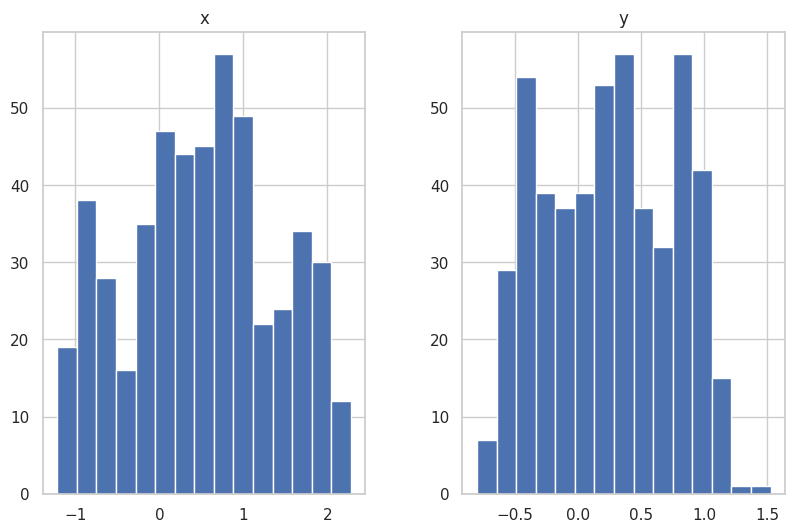

In [ ]:
# Histograma para cada columna
df.hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.show()


### Análisis de los histogramas:

1. Variable X:

* Forma: La distribución de X parece ser aproximadamente simétrica, con una ligera inclinación hacia la derecha. Esto sugiere que la mayoría de los valores se encuentran alrededor del centro, con algunos valores más grandes hacia la derecha.
*Rango: Los valores de X van desde aproximadamente -1 hasta 2.
* Moda: La moda (el valor que más se repite) parece estar alrededor de 1.

2. Variable Y:

* Forma: La distribución de Y también es aproximadamente simétrica, pero un poco más centrada alrededor de 0.
* Rango: Los valores de Y van desde aproximadamente -0.5 hasta 1.2.
* Moda: La moda parece estar alrededor de 0.5.

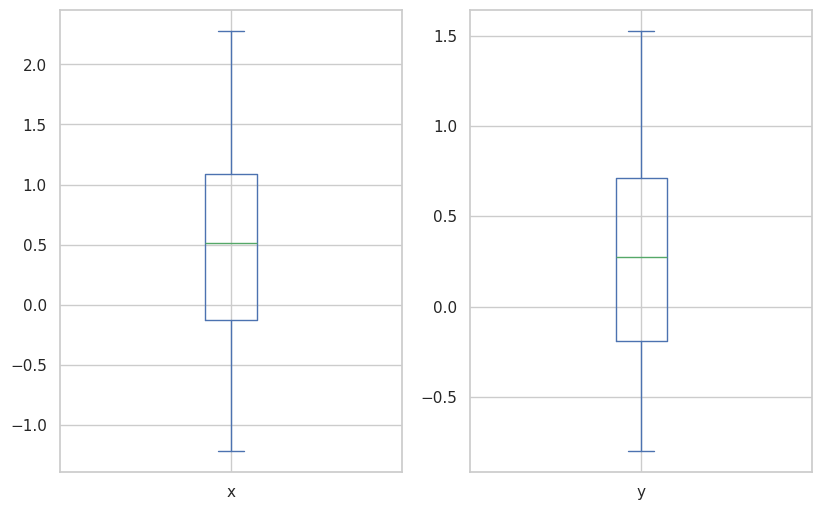

In [ ]:
# Boxplot para cada columna
df.plot(kind='box', subplots=True, layout=(1, 3), figsize=(15, 6), sharex=False, sharey=False)
plt.show()

### Análisis de los diagramas de caja :

Observando los diagramas de caja de las variables X e Y, podemos extraer las siguientes conclusiones:

1. Tendencia central:
* La línea verde dentro de cada caja representa la mediana, que es el valor que divide los datos en dos partes iguales. En ambos casos, la mediana se encuentra cerca del centro del rango de valores, lo que sugiere una distribución aproximadamente simétrica.
2. Dispersión:
* La altura de la caja representa el rango intercuartílico (IQR), que es la distancia entre el primer cuartil (Q1) y el tercer cuartil (Q3). En ambos casos, el IQR es similar, lo que indica una dispersión comparable de los datos.
3. Valores atípicos:
* Los "bigotes" que se extienden desde la caja representan el rango de los datos, excluyendo los valores atípicos. En ambos casos, hay valores atípicos superiores, indicados por los puntos por encima del bigote superior. Estos valores atípicos sugieren que hay algunos datos que son considerablemente más grandes que el resto.
4. Comparación entre X e Y:
* Ambos conjuntos de datos tienen una distribución similar en términos de forma y dispersión. Sin embargo, los valores de Y parecen estar ligeramente más concentrados alrededor de la mediana en comparación con los valores de X.

In [ ]:
# Mostrar la cantidad de filas antes de eliminar outliers
print(f'Antes: {df.shape[0]} filas\n')

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[float, int])

# Calcular los cuartiles y el IQR para cada columna numérica
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

print("IQR para cada columna:\n", IQR)

# Filtrar los outliers en todas las columnas numéricas
df_filtered = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar la cantidad de filas después de eliminar outliers
print(f'\nDespués: {df_filtered.shape[0]} filas')


Antes: 500 filas

IQR para cada columna:
 x    1.219018
y    0.905201
dtype: float64

Después: 500 filas


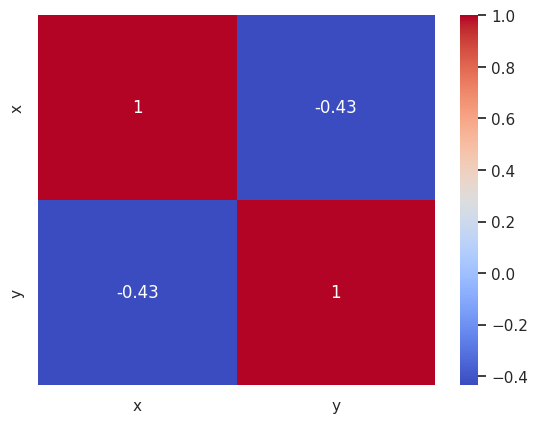

In [ ]:
# Matriz de correlación
correlation_matrix = df.corr()

# Heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Explicación del Heatmap de Correlación



### Valores de Correlación

- **Diagonal Principal (x con x e y con y)**:
  - El valor de correlación es 1, indicando una correlación perfecta consigo misma. Esto es siempre el caso en un heatmap de correlación.
- **Correlación entre `x` e `y`**:
  - El valor de correlación es -0.43.
  - Este valor indica una correlación negativa moderada entre `x` e `y`.

### Conclusiones

- Las variables `x` e `y` están moderadamente correlacionadas negativamente. Esto significa que a medida que los valores de `x` aumentan, es probable que los valores de `y` disminuyan, y viceversa.
- No hay una correlación extremadamente fuerte (positiva o negativa) entre las dos variables, lo que sugiere una relación lineal moderada.




-----
# Análisis de componentes principales PCA
----

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Preprocesamiento (escalar los datos)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [ ]:
#  Realización de PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

In [ ]:
# Porcentaje de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Porcentaje de varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance)

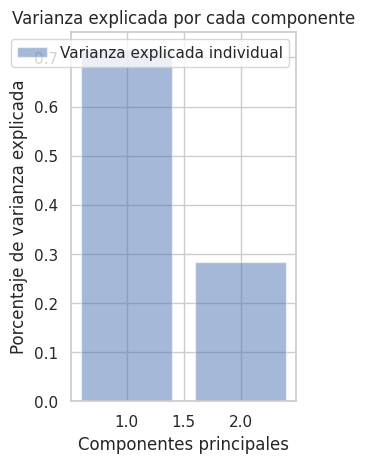

In [ ]:
# Porcentaje de varianza explicada por cada componente
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza explicada individual')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Varianza explicada por cada componente')
plt.legend()

### Interpretación de los resultados:
* Componente Principal 1: Esta componente es la que más variabilidad explica, aproximadamente un 70%. Esto significa que la mayor parte de la información contenida en los datos originales se puede representar en esta primera dimensión.
* Componente Principal 2: La segunda componente explica una proporción menor de la varianza, alrededor del 30%. A pesar de ser menos importante que la primera, sigue siendo relevante ya que captura una parte significativa de la variabilidad restante.

In [ ]:
# Elegimos el número de componentes que explique la mayor parte de la varianza (por ejemplo, 2 componentes)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

----
# DBSCAN Clustering

----

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [ ]:
# Lista de posibles valores para eps y min_samples
eps_values = np.arange(0.1, 1.1, 0.05)
min_samples_values = np.arange(2, 20, 1)

In [ ]:
# Variables para guardar los mejores valores encontrados
best_eps = None
best_min_samples = None
best_silhouette_score = -1

In [ ]:
# Búsqueda de grilla
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_pca)

        # Ignorar configuraciones que generan un solo cluster o todos los puntos como outliers
        if len(set(clusters)) <= 1:
            continue

        silhouette_avg = silhouette_score(data_pca, clusters)

        if silhouette_avg > best_silhouette_score:
            best_eps = eps
            best_min_samples = min_samples
            best_silhouette_score = silhouette_avg

print(f'Mejores parámetros encontrados:')
print(f'eps: {best_eps}')
print(f'min_samples: {best_min_samples}')
print(f'Silhouette Score: {best_silhouette_score:.2f}')

Mejores parámetros encontrados:
eps: 0.3500000000000001
min_samples: 15
Silhouette Score: 0.34


### Explicación de los Mejores Parámetros Encontrados

**1. Parámetro `eps`: 0.35**
- **Definición**: Distancia máxima para que dos puntos sean considerados vecinos.
- **Significado**: Un `eps` de 0.35 equilibra la agrupación de puntos similares y evita incluir puntos disímiles.

**2. Parámetro `min_samples`: 15**
- **Definición**: Número mínimo de puntos para formar un clúster.
- **Significado**: Un valor de 15 garantiza que solo se formarán clústeres densos, evitando la creación de clústeres a partir de puntos aislados.

**3. Silhouette Score: 0.34**
- **Definición**: Mide la calidad del clustering, variando entre -1 y 1.
  - **1**: Puntos bien agrupados y claramente distintos.
  - **0**: Puntos en el borde de dos clústeres.
  - **-1**: Puntos mal agrupados.
- **Interpretación**: Un valor de 0.34 sugiere que los clústeres son moderadamente buenos, con margen para mejorar.



In [ ]:
# Aplicar DBSCAN con los mejores parámetros encontrados
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(data_pca)

In [ ]:
# Añadir los resultados de clustering al DataFrame original
df_filtered['Cluster'] = clusters


In [ ]:
# Contar el número de clusters excluyendo el ruido
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f'Número de clusters identificados: {n_clusters}')

Número de clusters identificados: 2


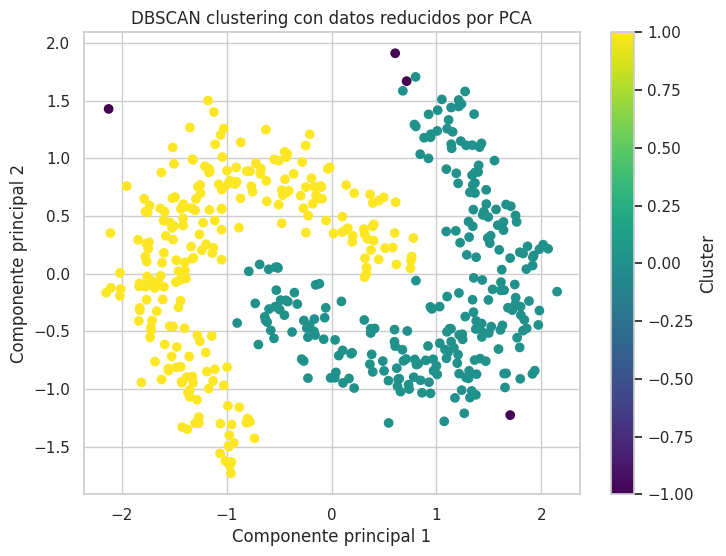

In [ ]:
# Visualización de los clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('DBSCAN clustering con datos reducidos por PCA')
plt.colorbar(label='Cluster')
plt.show()

## Análisis y Explicación



### Clustering

- **Puntos de colores diferentes**: Representan diferentes clústeres identificados por el algoritmo DBSCAN.
  - **Amarillo**: Un clúster significativo.
  - **Verde**: Otro clúster significativo.
  - **Púrpura**: Puntos identificados como ruido (no pertenecen a ningún clúster).

### Parámetros Utilizados

- **eps = 0.3**: La distancia máxima entre dos muestras para que una sea considerada como vecina de la otra.
- **min_samples = 15**: El número mínimo de muestras en un vecindario para que un punto sea considerado como núcleo.

### Evaluación del Clustering

- **Silhouette Score = 0.34**: Una medida de la calidad del clustering. Un valor más cercano a 1 indica clusters bien definidos. Un valor de 0.34 indica que los clusters son razonablemente definidos, pero hay margen de mejora.

### Conclusiones

El gráfico muestra que el algoritmo DBSCAN con los parámetros óptimos (eps = 0.3 y min_samples = 15) ha identificado dos clústeres principales y algunos puntos de ruido. Los datos fueron reducidos dimensionalmente utilizando PCA, lo cual ayudó a visualizar mejor los clústeres en un espacio bidimensional.

El Silhouette Score de 0.34 sugiere que, aunque hay una estructura de clústeres discernible, los límites entre los clústeres no son completamente claros.

